<a href="https://colab.research.google.com/github/Priyadrshi/docs/blob/main/apiori_basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install apyori


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=ed629adad627724673ad5dc64294706f978ae4354333ff9ad50d86840dd72d31
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [2]:


import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting



In [3]:
url =('https://raw.githubusercontent.com/Priyadrshi/docs/main/Groceries_dataset.csv')
df = pd.read_csv("https://raw.githubusercontent.com/Priyadrshi/docs/main/Groceries_dataset.csv") ## Loading dataset
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [7]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [22]:
Item_distr = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

In [23]:
Item_distr

,itemDescription,Frequency
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


In [24]:
df.groupby(['Date'])['itemDescription'].agg(['count'])

,count
Date,
2014-01-01,48
2014-01-02,62
2014-01-03,54
2014-01-04,64
2014-01-05,44
...,...
2015-12-26,37
2015-12-27,74
2015-12-28,58


In [26]:
len(df['itemDescription'].unique())

167

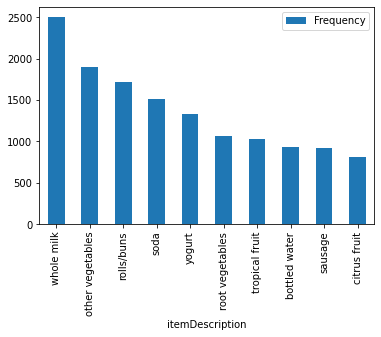

In [10]:
Item_distr.plot(kind='bar',x='itemDescription',y='Frequency')

In [11]:
df_date=df.set_index(['Date'])
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


In [12]:
print(df_date.resample("M"))

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [ ]:
df.head()

In [ ]:

result = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'itemDescription':sum})
result

In [ ]:
d=df_date.resample("M")['itemDescription'].count()
d.plot(kind='line')

In [ ]:
df["Member_number"].unique

In [ ]:
df_date.resample("D")['itemDescription'].count()

In [36]:
dg=df.groupby(['Member_number','Date'])['itemDescription'].apply(sum)
dg

Member_number  Date      
1000           2014-06-24                   whole milkpastrysalty snack
               2015-03-15    sausagewhole milksemi-finished breadyogurt
               2015-05-27                        sodapickled vegetables
               2015-07-24                    canned beermisc. beverages
               2015-11-25                       sausagehygiene articles
                                                ...                    
4999           2015-05-16                 butter milkwhipped/sour cream
               2015-12-26                            bottled waterherbs
5000           2014-09-03                   fruit/vegetable juiceonions
               2014-11-16                  bottled beerother vegetables
               2015-10-02        sodaroot vegetablessemi-finished bread
Name: itemDescription, Length: 14963, dtype: object

In [59]:
cust_level = df.sort_values(by = "Member_number", ascending = True) ## Selecting only required variables for modelling
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Removing white spaces if any
cust_level

,Member_number,Date,itemDescription
1629,1000,2015-05-27,soda
13331,1000,2014-06-24,whole milk
8395,1000,2015-03-15,whole milk
4843,1000,2015-03-15,sausage
17778,1000,2015-05-27,pickled vegetables
...,...,...,...
34885,5000,2015-10-02,semi-finished bread
25489,5000,2014-11-16,other vegetables
9340,5000,2014-11-16,bottled beer
27877,5000,2014-09-03,onions


In [61]:
cust_level.groupby(['Member_number'])['itemDescription'].apply(sum)

Member_number
1000    sodawhole milkwhole milksausagepickled vegetab...
1001    whole milksausagecurdsodabeeffrankfurterwhite ...
1002    other vegetablesfrozen vegetablesspecialty cho...
1003    rolls/bunsdental caredetergentsausagerolls/bun...
1004    whole milkpackaged fruit/vegetableswhole milkc...
                              ...                        
4996    misc. beveragesdessertsodadecalcifiersemi-fini...
4997    curdwhole milkwhite winetropical fruitcanned b...
4998                                       curdrolls/buns
4999    other vegetablesyogurtwhipped/sour creamtropic...
5000    root vegetablesfruit/vegetable juicesemi-finis...
Name: itemDescription, Length: 3898, dtype: object

In [62]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] ## Combing all the items in list format for each cutomer
transactions[:2]

[['soda',
  'whole milk',
  'whole milk',
  'sausage',
  'pickled vegetables',
  'canned beer',
  'yogurt',
  'misc. beverages',
  'salty snack',
  'sausage',
  'semi-finished bread',
  'hygiene articles',
  'pastry'],
 ['whole milk',
  'sausage',
  'curd',
  'soda',
  'beef',
  'frankfurter',
  'white bread',
  'frankfurter',
  'whipped/sour cream',
  'rolls/buns',
  'whole milk',
  'soda']]

In [44]:
transaction = [a[1]['itemDescription'].tolist() for a in list(df.groupby(['Member_number','Date']))]
transaction[:2]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']]

In [68]:
from apyori import apriori ## Importing apriori package
rules = apriori(transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) 
results=list(rules)
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [72]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [79]:
results[0][2][0][0]

frozenset({'kitchen towels'})

In [73]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239
4,flour,mayonnaise,0.002309,0.063380,3.338599
5,rice,napkins,0.003079,0.244898,3.011395
6,sparkling wine,waffles,0.002565,0.217391,3.150154
